### ASTR 8070: Astrostatistics
***S. R. Taylor***
___

# Homework 2
### Due: Saturday, Jan 25th at 11.59pm CST
---

In [26]:
# Setup imports
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stat

## Problem 1

This question is about Monte Carlo integration. A standard Gaussian integral takes the form 

$$ \int_0^\infty x^3 \exp\left(-\frac{x^2}{2\sigma^2}\right) \,dx$$

1) What does this integral analytically evaluate to? (Should involve $\sigma$.) Once you work this equation out, we will refer to this equality of the integral and analytic value as EQ1. 

2) Write down the standard form of a Gaussian distribution with $\mu=0$ and $\sigma=\sigma$ that is normalized between $\infty$ and $+\infty$. What is the corresponding form of a half-Gaussian distribution between $0$ and $+\infty$? (Remember that the half-Gaussian distribution must be normalized such that it integrates to one.)

3) Manipulate EQ1 such that you can write the integral in terms of a function of $x$ weighted by a normalized half-Gaussian distribution. 

4) Draw $N=10^5$ samples from a $\sigma=2$ normal distribution, mask the samples such that only positive values are accepted, then perform Monte Carlo integration using your new equation involving a half-Gaussian distribution from (3). Confirm that this *approximately* matches the value computed from the right hand side of the equation. If you don't get approximately matching values then you may have forgotten normalization factors for the Gaussian, or constant factors from translating a normalized Gaussian to a half-Gaussian.

5) Repeat (3) for $N=[10^2,10^3,10^4]$, computing the integral using $100$ different batches of random samples for each $N$. Record all calculated values at all $N$. 

6) Make a plot that shows $\log_{10}N$ along the $x$-axis and the spread between the maximum and minimum Monte Carlo integral values that you get at each $N$ on the $y$-axis. (Note: matplotlib's `fill_between` command is useful for this). Plot a horizontal line on the same figure to show the precise mathematical value. You should see that Monte Carlo integration results in less numerical spread as $N$ gets larger.

### Solution

In [169]:
#4
def pdfFunction(x,sigma):
    return x**3 * (np.sqrt(2) / (np.sqrt(np.pi) * sigma)) * np.exp((-1/2) * (x/sigma)**2)
    
def monteCarlo(size,sigma):
    distN = stat.norm(loc=0,scale=sigma)
    samples = distN.rvs(size=size)
    samples = samples[samples > 0]
    sum = 0
    for i in samples:
        sum += pdfFunction(i,sigma)
    answer = 10/size * sum
    return answer

sigma = 2
rhs = (2 * np.sqrt(2) * sigma**3) / np.sqrt(np.pi)
print("Monte Carlo integration gives: ", monteCarlo(10**5,sigma)*sigma)  
print("Right hand side of equation gives: ",rhs)

Monte Carlo integration gives:  6.374588281946041
Right hand side of equation gives:  12.766152972845848


<font color="blue"> I am off by a factor of sigma and I have no clue why, all of the other code works fine as long as i  multiply the result of the Monte Carlo by sigma. I am sure there is an easy error I cannot see. </font>

In [171]:
# Generate all of the data
sizes = [10**2,10**3,10**4]
batches = np.zeros((3,100))
for i, amount in enumerate(sizes):
    for j in range(len(batches[i])):
         batches[i][j] = monteCarlo(amount,sigma) * sigma
for i in range(len(batches)):
    batches[i] = np.sort(batches[i])

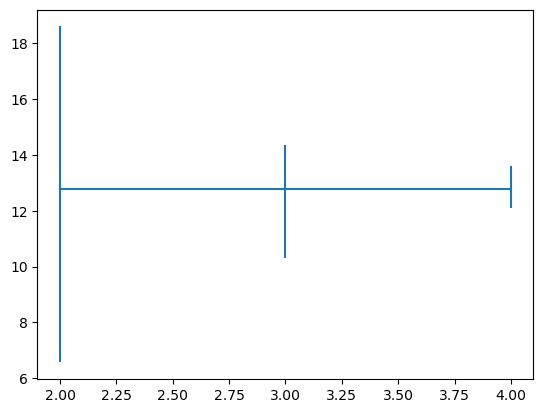

In [175]:
#5 Plot output
for i in range(3):
    plt.vlines(np.log10(sizes[i]),batches[i][0],batches[i][-1])
plt.plot(np.log10(sizes),[rhs,rhs,rhs])
plt.show()

SRT: Joe, where are your answers to parts 1-3? I don't see any markdown equations are pasted screenshots, or additional pdfs. I'm subtracting 7 points because half the solution appears to be missing.

The answers you're getting suggest your analytic solution to the integral is incorrect. 

Moreover, your code does not implement Monte Carlo integration correctly. The idea is that by drawing from a Gaussian, masking, then taking the average of `x^3` over those samples, you can approximate the integral. An example is below. -3 points

Finally, your sum over samples in your attempt at Monte Carlo integration is inefficient. By vectorizing you can make it much faster, e.g., `np.sum(pdfFunction(samples,sigma))` -2 points

In [ ]:
def monte_carlo_integral(sigma):
    x = np.random.normal(0.0,sigma,100000)
    mask = x >= 0.
    x = x[mask]
    return np.mean(x**3) * 0.5 * np.sqrt(2.0*np.pi*sigma**2)

## Problem 2

This question is about IQ. It's a flawed and questionable metric, but useful for this problem. By definition, IQ is calibrated as a Gaussian distribution with $\mu=100$ and $\sigma=15$. 

1) Create a `scipy.stats` Gaussian object with these properties. Plot the distribution, and print out 10 random draws, along with the pdf at $x=150$. 

2) Access the `cdf` property of the Gaussian object and plot it over the same $x$-range as in (1) but in a different figure. Access the `ppf` property (percent point function) and use *inverse transform sampling* of the cdf to draw $10^5$ random samples, and make a histogram of these. Overplot the pdf from (1). These should match.

3) What fraction of people have IQ > 150? *Hint: investigate all the properties of the Gaussian object from (1) to find the relevant property that gives you this, or perform a calculation involving the cdf.*

4) What IQ corresponds to "one in a million"?

### Solution

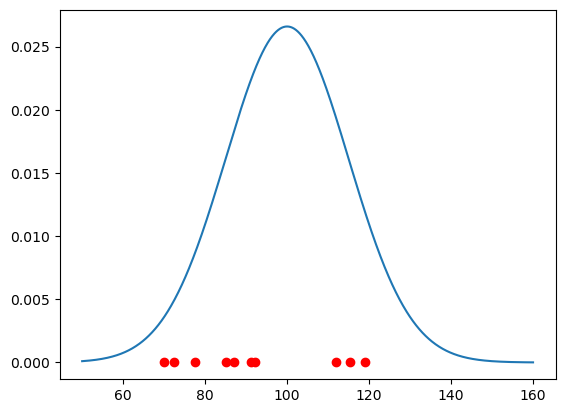

The value at 150 is:  0.00010281859975274035


In [85]:
# 1. Create the gaussian object with the parameters for iq
iqDist = stat.norm(loc=100,scale=15)
xgrid = np.linspace(50,160,1000)
N=10
draws = iqDist.rvs(N)

plt.plot(xgrid,iqDist.pdf(xgrid))
plt.scatter(draws,np.zeros(N),color='red')
plt.show()
print("The value at 150 is: ",iqDist.pdf(150))

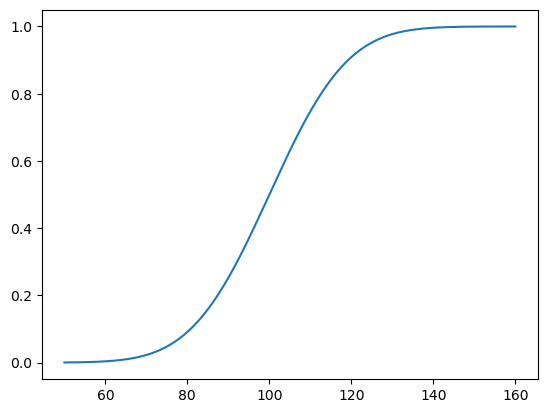

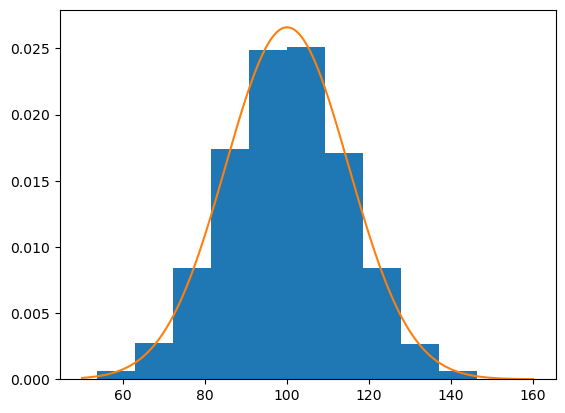

In [87]:
#2 Plot the cdf on a different figure
plt.plot(xgrid,iqDist.cdf(xgrid))
plt.show()

#3 Take samples from a uniform distribution
u = np.random.uniform(0.001, 0.999, 100000) 
#Put those samples through the ppf
sample = iqDist.ppf(u)
#plot histogram and pdf
plt.hist(sample,density=True)
plt.plot(xgrid,iqDist.pdf(xgrid))

In [94]:
#3
print("The fraction of people with an IQ above 150 is: ", 1 - iqDist.cdf(150))
#4 
for i in range(150,180):
    if 1 - iqDist.cdf(i) <= 0.000001:
        print("One in a million IQ is: ", i)
        break

The fraction of people with an IQ above 150 is:  0.0004290603331967846
One in a million IQ is:  172


SRT: Very good.

## Problem 3

This question is about Poisson distributions. A famous early application was an analysis of Prussian cavalryman horse-kick deaths by [Bortkiewicz](https://www.wikiwand.com/en/Ladislaus_Bortkiewicz) in 1898. Let's take a short look at the kind of data he analyzed.

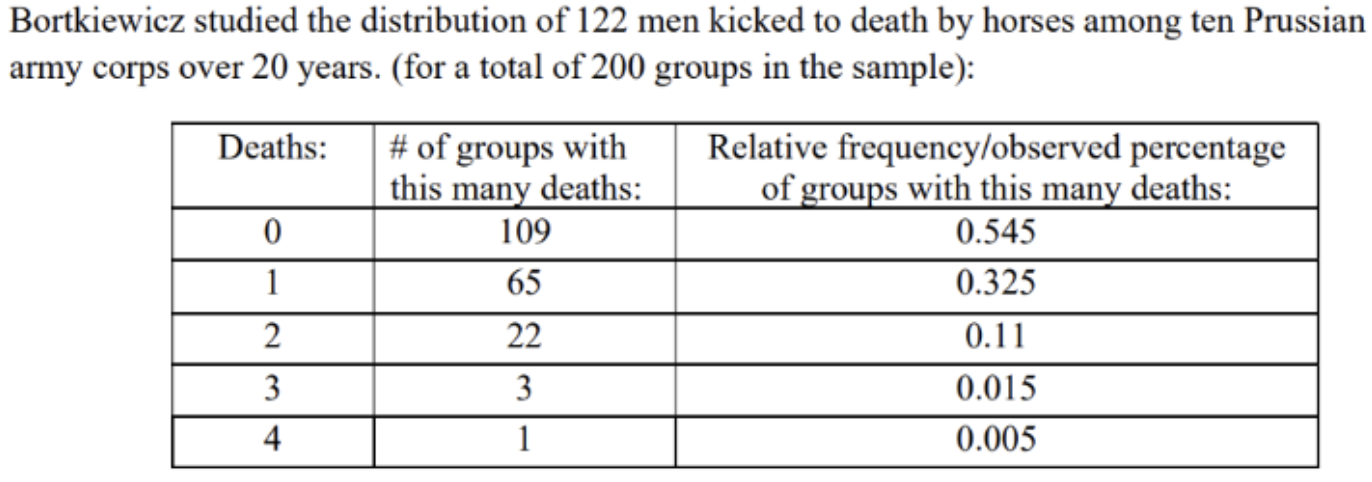

The data essentially consist of 200 total years of Prussian army corps information (i.e. ten army corps over 20 years).

1) Make a plot of the first and third columns of this data.

2) Plot a few Poisson distributions on top that are characterized by different $\mu$ values that might be reasonable guesses for how the data is distributed.

3) We'll come to model fitting soon, but for now use the descriptive sample statistics that you can calculate from this data to deduce the $\mu$ of the modeled Poisson distribution, e.g. the mean, std, median, mode, skewness, and kurtosis, where relevant. Do this however you like, but note that with the data in the table you won't just be able to get a sample mean, since these are tabulated densities, not samples. 

*Hint: use a weighted mean, or alternatively make a dataset that has the numbers 0,1,2,3,4 in agreement with their frequency in the table.*

4) Plot the Poisson distribution with the $\mu$ found in (3) alongside the data.

### Solution

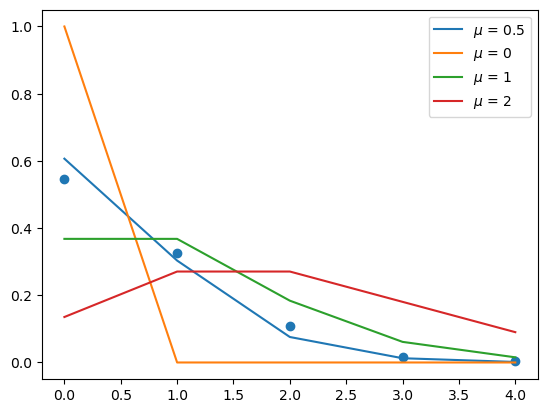

In [35]:
#1. Make the plot of the first and third columns as well as different Poisson guesses
deaths = [0,1,2,3,4]
percentage = [0.545,0.325,0.11,.015,.005]
plt.scatter(deaths,percentage)


#2.Make a couple of guesses of Poisson distributions
dist1 = stat.poisson(mu=0.5)
dist2 = stat.poisson(mu=0)
dist3 = stat.poisson(mu=1)
dist4 = stat.poisson(mu=2)
plt.plot(deaths,dist1.pmf(deaths),label=r'$\mu$ = 0.5')
plt.plot(deaths,dist2.pmf(deaths),label=r'$\mu$ = 0')
plt.plot(deaths,dist3.pmf(deaths),label=r'$\mu$ = 1')
plt.plot(deaths,dist4.pmf(deaths),label=r'$\mu$ = 2')
plt.legend()

<font color='blue'> It looks like the 0.5 is the best estimate so far </font>

In [59]:
#Abomination to create dataset to do statistics on
dataset_0 = np.array([0])
dataset_0 = np.tile(dataset_0,108)
dataset_1 = np.array([1])
dataset_1 = np.tile(dataset_1,64)
dataset_2 = np.array([2])
dataset_2 = np.tile(dataset_2,22)
dataset_3 = np.array([3])
dataset_3 = np.tile(dataset_3,3)
dataset_4 = np.array([4])
dataset_4 = np.tile(dataset_4,108)
dataset = np.concatenate((dataset_0,dataset_1,dataset_2,dataset_3,dataset_4),0)

In [84]:
## Every single one of these should be the theoretical mean, so let's average them
stdmu = np.std(dataset)**2
modemu = 1 + stat.mode(dataset)[0]
skewmu = 1 / stat.skew(dataset)**2
kurmu = 1 / stat.kurtosis(dataset)
print("Standard Deviation mean: ",stdmu)
print("Mode mean: ",modemu)
print("Skew mean: ",skewmu)
print("Kurtosis mean: ",kurmu)

Standard Deviation mean:  3.0124590163934433
Mode mean:  1
Skew mean:  10.475209997275368
Kurtosis mean:  -0.6007439661979906


SRT: All of these should have been weighted by percentage, e.g., `mean=np.mean(deaths*percentage)=0.61`. -3 points

<font color='blue'> The only small value that makes sense to be the mean would be the kurtosis, tried below and it follows the data nicely when positive. </font>

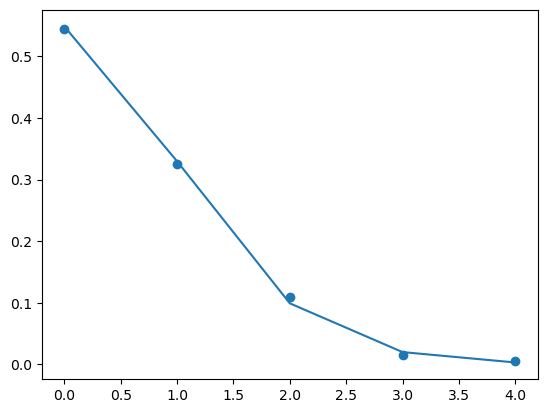

In [95]:
deaths = [0,1,2,3,4]
percentage = [0.545,0.325,0.11,.015,.005]
plt.scatter(deaths,percentage)
true_mu = abs(kurmu)
distTrue = stat.poisson(mu=true_mu)
plt.plot(deaths,distTrue.pmf(deaths),label=r'$\mu$ = ' + str(true_mu))

SRT: That's fair and I'm glad you reasoned towards 0.61, but see your error above to fix in a more principled way.

SRT: 35/50